In [16]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from spectrographic import SpectroGraphic, ColumnToSound

In [2]:
sound_file = "../../audio_files/munch.wav"

# 1. Checking out .wav files
Find out the sample rate, bit depth, and number of channels of `munch.wav`

In [3]:
from scipy.io import wavfile

sample_rate, audio_data = wavfile.read(sound_file)
print(f"Sample Rate: {sample_rate} Hz")
print(f"Bit Depth: {audio_data.dtype}") 
print(f"Channels: {audio_data.shape[1] if len(audio_data.shape) > 1 else 1}")


Sample Rate: 48000 Hz
Bit Depth: int16
Channels: 1


# 2. Visualizing the waveform 
A waveform graphically represents sound's amplitude variations over time, acting as an audio fingerprint. The x-axis shows time, while the y-axis displays normalized amplitude from -1 to 1.

Key features visible in waveforms:
* **Peaks**: Indicate loud moments like drum hits  
* **Zero Crossings**: Points where amplitude crosses zero, important for speech analysis
* **Envelope**: Overall loudness contour

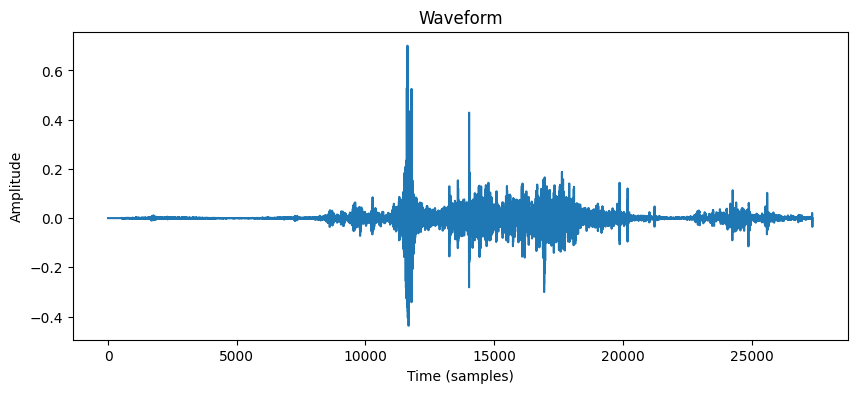

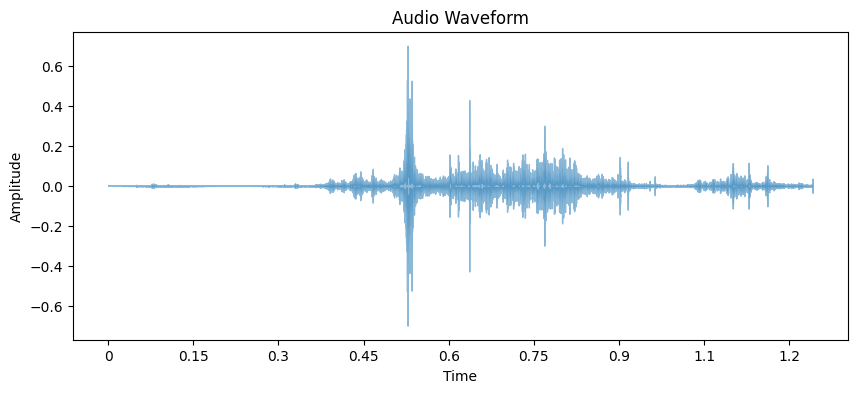

In [4]:
y, sr = librosa.load(sound_file)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

# alternatively:
# Configure plot
plt.figure(figsize=(10, 4))
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Plot with time axis
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.show()

## Waveform exercise: 
Record different sounds (clap, vowel sounds) and compare their waveforms. What do you see?
[Go here for recording](https://products.aspose.app/audio/voice-recorder/wav) and modify code below to visualize.  

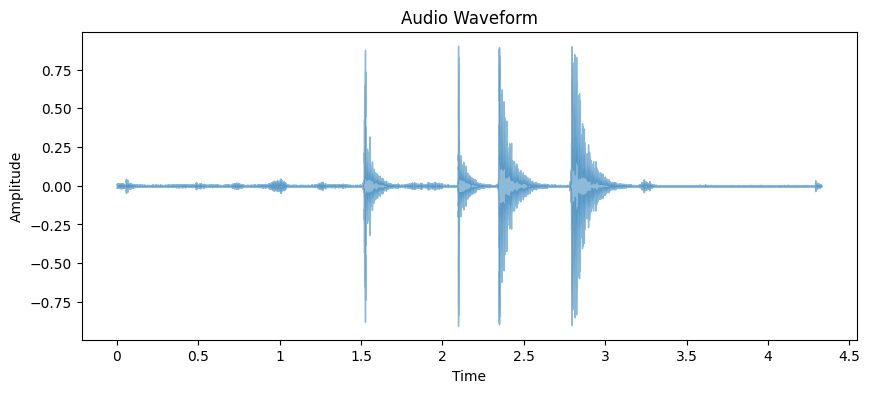

In [5]:
# modify this code!
my_sound = "../../audio_files/record_out.wav" # file path to your sound
yy, s_r = librosa.load(my_sound)

# Configure plot
plt.figure(figsize=(10, 4))
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Plot with time axis
librosa.display.waveshow(yy, sr=s_r, alpha=0.5)
plt.show()

# 3. Visualizing with spectrograms
While waveforms show amplitude changes, spectrograms reveal frequency components over time-answering "what pitches are present when?"

They use color intensity (typically a heat map) to represent energy at specific frequency bands.


**The Science Behind Spectrograms**
* **Short-Time Fourier Transform (STFT):** Divides audio into short segments (windows) and computes their frequency content
* **Decibel Conversion:** Amplitude values convert to dB scale for better perceptual accuracy
* **Time-Frequency Tradeoff:** Longer windows improve frequency resolution but blur time details


Interpreting Spectrogram Features:
* **Horizontal Lines:** Constant frequencies (e.g., musical notes)
* **Vertical Striations:** Rapid amplitude changes (consonants in speech)
* **Formants:** Dark bands in vowel sounds indicating vocal tract resonances

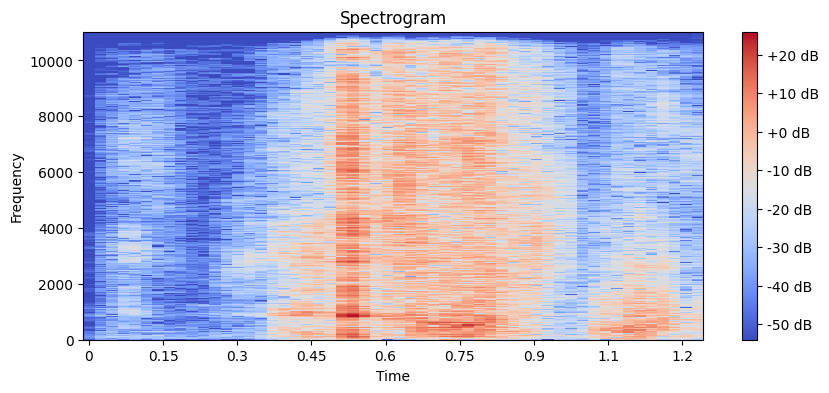

In [6]:
# Create a spectrogram
plt.figure(figsize=(10, 4))
S = librosa.stft(y)  # Short-time Fourier transform
S_db = librosa.amplitude_to_db(abs(S))  # Convert amplitude to decibels

librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

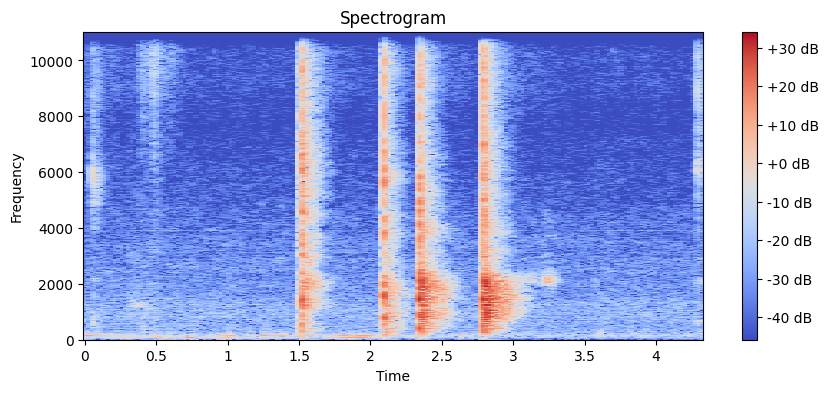

In [7]:
# Spectrogram for your own sound
# modify this code!
my_sound = "../../audio_files/record_out.wav" # file path to your sound
yy, s_r = librosa.load(my_sound)

# Create a spectrogram
plt.figure(figsize=(10, 4))
S2 = librosa.stft(yy)  # Short-time Fourier transform
S_db2 = librosa.amplitude_to_db(abs(S2))  # Convert amplitude to decibels

librosa.display.specshow(S_db2, sr=s_r, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# 4. Experimenting
The code below creates a sound. By default, it is a single tone modulated up and down with `noise` added. Try some of the following:

* increasing and decreasing the `sampling rate (fs)`
    * what happens to time?
* removing the `+ noise` on `x`
    * what happens to the sound? how about the spectrogram and waveform plots?
* generating a sound at a set sampling rate, but changing the sampling rate on the audio player
    * what happens to the sound?
* adding sounds together, such as the generated one and the one from `munch.wav`. **Hint**: the signals need to be of equal length.  

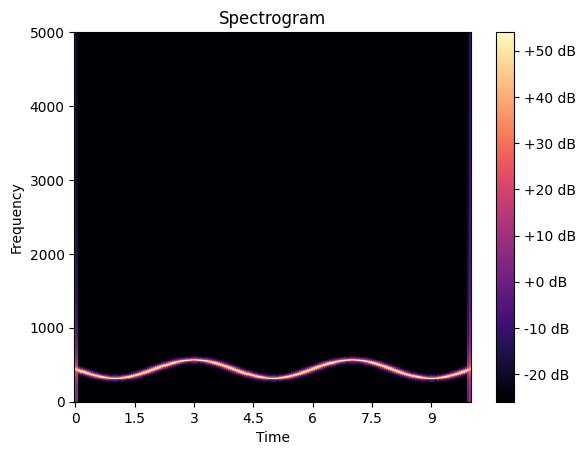

In [8]:
# generating a sound
rng = np.random.default_rng()
# this is the sample rate (10kHz)
fs = 10e3
# the number of samples (100,000)
N = 1e5
# the amplitude (loudness)
amp = 1 # * np.sqrt(2)
# if we add "noise"
noise_power = 0.01 * fs / 2

time = np.arange(N) / float(fs)
# modulation following a cosine wave slowly of 500 to -500 frequency 
mod = 500*np.cos(2*np.pi*0.25*time)
# the main sound -- frequency of 440 + the modulation times the amplitude
carrier = amp * np.sin(2*np.pi*440*time + mod)
# generating the noise to add 
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)

# putting the signal together -- carrier + noise
x = carrier #  + noise

# some conversions for spectrogram
X = librosa.stft(x)
X_db = librosa.amplitude_to_db(abs(X))

# plotting the spectrogram
librosa.display.specshow(X_db, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

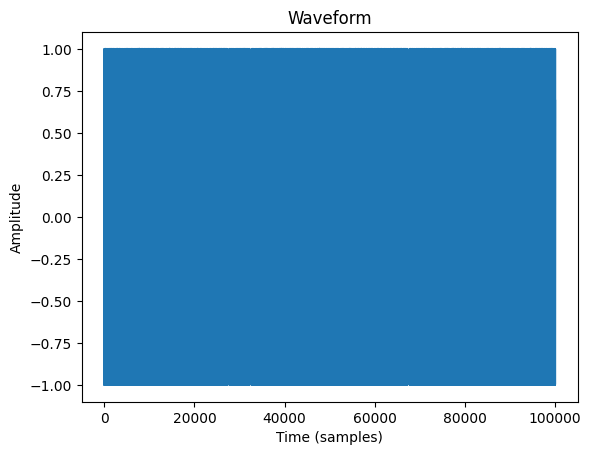

In [9]:
plt.plot(x)
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [10]:
Audio(x, rate=fs, autoplay=True)

# 5. More on Spectrograms and Short-time Fourier Transform

Imagine you have a song, and you want to know which notes (pitches) are being played at every moment. The `Short-Time Fourier Transform (STFT)` is a tool that helps you do just that.

**What Is the STFT?**
* The STFT is a way to look at a sound (or any signal) and see which frequencies (notes) are present at different times.  
* You can think of it like taking a long song and cutting it into lots of short pieces. For each piece, you figure out which notes are being played.  


**How Does It Work?**  

1. Cut the Sound into Short Pieces  
    * Imagine sliding a small window along the song, looking at just a little bit at a time—like reading a few words at a time in a long sentence.

2. Analyze Each Piece  
    * For each short piece, you use something called a Fourier Transform. This tells you which notes (frequencies) are in that little piece.  
        * the Fourier Transform takes a messy, combined signal and breaks it down into its basic building blocks: pure tones or frequencies.  
        * The result tells you "how much" of each note or frequency is present in the original signal.
        * Any signal or function can be thought of as a combination of simple waves (sines and cosines) with different frequencies and amplitudes.  


3. Repeat for the Whole Song  
    * You move the window a little bit and repeat the process, so you know which notes are being played at every moment in the song.

**What Do You Get?**  
* You get a picture called a `spectrogram.` This shows time on one axis, frequency (pitch) on the other, and color or brightness shows how loud each note is.

It’s like a musical map of the song!

**Why Is This Useful?**  

* Musicians and scientists use the STFT to see how music or sounds change over time.  
* It helps in speech recognition, music analysis, and even in studying animal sounds.


# 6. Images to Sound
Earlier we took a sound and converted it to a Spectrogram through the STFT. We had `frequency` on the y-axis, `time` on the x-axis, and `amplitude/intensity` as the color.   

What if we think of an **image** as a **Spectrogram**? Can we convert it to sound?  

In fact, many musicians have tried this!  

We have some code to try ourselves. 


## Step-by-Step Explanation: Converting a Greyscale Image to Sound

`spectrographic.py` converts a greyscale image into sound such that, when visualized as a spectrogram, the sound "draws" the image. Here’s how it works, step by step:

---

**1. Load and Resize the Image**

- The image is loaded using PIL’s `Image.open`.
- It is resized to a fixed height (default 100 pixels), preserving the aspect ratio. This limits the frequency resolution needed for the audio representation.

**2. Convert Image to Greyscale and Normalize**

- The image is converted to greyscale (`mode="L"`).
- The pixel values are converted to a NumPy array and normalized to the range [0, 1] by dividing by 255.
- The array is transposed so each column (vertical slice) of the image corresponds to a time slice in the audio.

**3. Optional: Binarize Image**

- If the `use_black_and_white` flag is set, the image is further binarized: pixels ≥ 0.5 become 1 (white), and < 0.5 become 0 (black), then inverted so black pixels correspond to sound.

**4. Convert Each Image Column to a "Sound Wall"**

- Each column is processed sequentially:
    - Each column represents a time slice in the audio.
    - For each pixel in the column:
        - Its vertical position (y) is mapped to a frequency between `min_freq` and `max_freq` (e.g., 1000 Hz to 8000 Hz).
        - Its intensity (brightness) determines the loudness of the corresponding frequency.
        - The method `pixel_to_sound` creates a sine wave at the mapped frequency, with amplitude based on pixel intensity and a contrast factor to enhance differences.
        - Multiple tones (harmonics) are added for each pixel to fill out the sound.

**5. Sum Pixel Sounds for Each Column**

- For each column, the sounds from all pixels are summed to create a complex waveform representing that column’s vertical content as a spectrum.

**6. Concatenate All Columns in Time**

- The audio for each column is concatenated horizontally (in time) to form the full audio array. Each column’s sound lasts for a short duration, so the final sound’s length equals the number of columns times the per-column duration.

**7. Normalize and Convert Audio Data**

- The audio data is normalized to fit the 16-bit integer range required for standard audio formats.

**8. Play or Save the Resulting Sound**

- The sound can be played directly or saved as a `.wav` file.

---

### **Summary Table: Image-to-Sound Mapping**

| Image Step | Audio Equivalent |
| :-- | :-- |
| Vertical pixel position | Frequency (pitch) |
| Pixel brightness | Amplitude (loudness) |
| Image column | Short time slice in audio |
| Sequence of columns | Sequence of time slices (full sound) |


---

### **Key Points**

- **Frequency Mapping:** The vertical axis of the image maps to frequency; higher pixels correspond to higher frequencies.
- **Time Mapping:** The horizontal axis maps to time; each column is a time slice.
- **Amplitude Mapping:** Pixel brightness controls the loudness of the corresponding frequency.
- **Spectrogram Drawing:** When the resulting sound is visualized as a spectrogram, it reconstructs the original image.

---

**In essence, this code "sonifies" an image, encoding its vertical structure as frequencies and its horizontal structure as time, so the image can be "heard" and reconstructed visually from the sound’s spectrogram[^1].**

---


### Using SpectroGraphic
There are several parameters we can adjust when converting an image to sound with the code:  
* `height`: y-resolution of the spectrogram, will affect how detailed frequency information can be  
* `duration`: how long we want the sound to be  
* `min_freq`: how low in pitch the sounds can be, default=1000.  
* `max_freq`: high high in pitch the sounds can be, default=8000.   
* `sample_rate`: default=44100  
* `num_tones`: Number of tones (harmonics) used to fill in each pixel sound, default=3. 
* `contrast`: difference/contrast between loud and quiet pixels, default=5.

In [11]:
# load in an image
sg = SpectroGraphic(path="../../images/pikachu.jpg")

In [12]:
# converts and plays the image as a sound
sg.play()

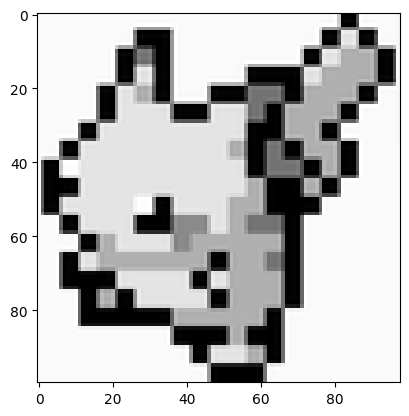

In [13]:
# show the greyscake image
plt.imshow(sg.image, cmap="Grays_r")

C:\Users\Eric\AppData\Local\Temp\ipykernel_21264\2077927140.py:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(Xp, sr=sg.SAMPLE_RATE, x_axis='time', y_axis='hz')


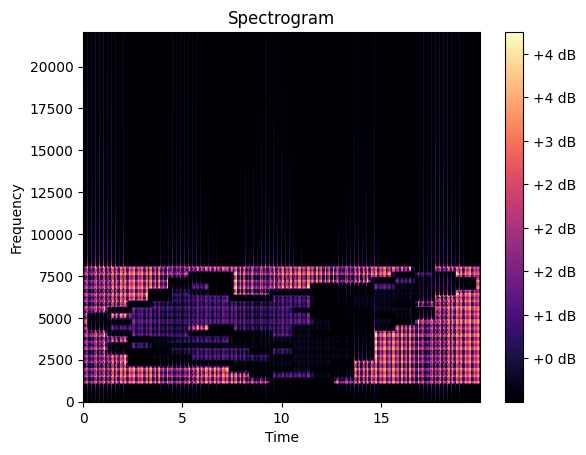

In [14]:
# visualizing the sound as a spectrogram 
# some conversions for spectrogram
Xp = librosa.stft(sg._sound_array.astype(np.float32)/32768.0) # convert the 16bit sound to float32 (normalize for -1 to 1) 
# X_db = librosa.amplitude_to_db(abs(Xp)) # ampl to db conversion, may not be necessary

# plotting the spectrogram
librosa.display.specshow(Xp, sr=sg.SAMPLE_RATE, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [21]:
# converting indivdual pixel location to a sound
Audio(ColumnToSound(2).pixel_to_sound(440), rate=sg.SAMPLE_RATE)